In [24]:
import numpy as np
filePath = "rcv1_train.binary"

def readData(filePath):
    with open(filePath) as f:
        data = f.readlines()
    data = [x.strip() for x in data]
    data = data[:200]
    
    data = [x.split() for x in data]
    #this is a sparse representation of the data
    y = [int(x[0]) for x in data]
    x = []
    for i in data:
        new_row = np.zeros(47205)
        for j in i[1:]:
            index = int(j.split(":")[0])
            value = float(j.split(":")[1])
            new_row[index-1] = value
        x.append(new_row)

    x_0 = np.ones((len(x),1))
    x = np.array(x)
    x = np.concatenate((x_0,x),axis=1)
    y = np.array(y)
    return x,y

x, y = readData(filePath)

experimentTimes = 1
updateNumList = []
w_length = []
for i in range (experimentTimes):
    now_w_length = []
    np.random.seed(i)
    weight = np.zeros(x.shape[1])
    now_w_length.append(np.linalg.norm(weight))
    correct = 0
    updateNum = 0
    tryNew = True
    while True:
        if tryNew == True:
            index = np.random.randint(0, x.shape[0])
        
        if np.sign(np.dot(weight, x[index])) == 0:
            prediction = -1
        else:
            prediction = np.sign(np.dot(weight, x[index]))
            
        if prediction != y[index]:
            weight = weight + y[index] * x[index]
            tryNew = False
            updateNum += 1
            now_w_length.append(np.linalg.norm(weight))
            #reset correct
            correct = 0
        else:
            correct += 1
            tryNew = True
             
        if correct == 5 * x.shape[0]:
            break
    w_length.append(now_w_length)
    updateNumList.append(updateNum)
    print(weight[0:50])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.28964965 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.15587948 0.
 0.         0.12655513 0.08643672 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.29306542 0.         0.
 0.         0.        ]


In [29]:
import numpy as np
filePath = "rcv1_train.binary"

def readData(filePath):
    with open(filePath) as f:
        data = f.readlines()
    data = [x.strip() for x in data]
    data = data[:200]
    
    data = [x.split() for x in data]
    #this is a sparse representation of the data
    y = [int(x[0]) for x in data]
    x = []
    for i in data:
        new_row = np.zeros(47205)
        for j in i[1:]:
            index = int(j.split(":")[0])
            value = float(j.split(":")[1])
            new_row[index-1] = value
        x.append(new_row)

    x_0 = np.ones((len(x),1))
    x_0 = np.full((len(x), 1), 2)
    x = np.array(x)
    x = np.concatenate((x_0,x),axis=1)
    #x = 3 * x
    y = np.array(y)
    return x,y

x, y = readData(filePath)

experimentTimes = 1
updateNumList = []
w_length = []
for i in range (experimentTimes):
    now_w_length = []
    np.random.seed(i)
    weight = np.zeros(x.shape[1])
    now_w_length.append(np.linalg.norm(weight))
    correct = 0
    updateNum = 0
    tryNew = True
    while True:
        if tryNew == True:
            index = np.random.randint(0, x.shape[0])
        
        if np.sign(np.dot(weight, x[index])) == 0:
            prediction = -1
        else:
            prediction = np.sign(np.dot(weight, x[index]))
            
        if prediction != y[index]:
            weight = weight + y[index] * x[index]
            tryNew = False
            updateNum += 1
            now_w_length.append(np.linalg.norm(weight))
            #reset correct
            correct = 0
        else:
            correct += 1
            tryNew = True
             
        if correct == 5 * x.shape[0]:
            break
    w_length.append(now_w_length)
    updateNumList.append(updateNum)
    print(weight[0:50]/3)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.09654988 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05195983 0.
 0.         0.04218504 0.02881224 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


median of updateNumList:  114.0


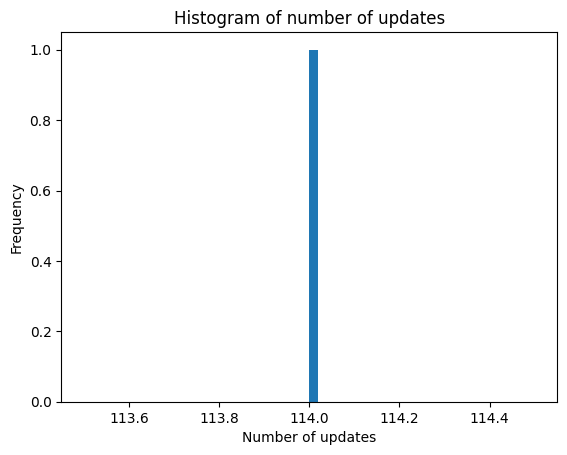

In [26]:
#plot the histogram of updateNumList
import matplotlib.pyplot as plt
plt.hist(updateNumList, bins=50)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of number of updates')
print("median of updateNumList: ", np.median(updateNumList))